In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df_train =  pd.read_csv('/content/drive/MyDrive/Capstone project/train.csv')

In [4]:
df_train.shape

(373989, 9)

In [5]:
df_train = df_train.iloc[:200000,:]

In [6]:
df_train.shape

(200000, 9)

In [7]:
df_train.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,31-03-2023 23:57,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,MISSION,"ARREST, BOOKED",POTRERO AV / 21ST ST,-122.406803,37.757763
1,31-03-2023 23:55,DISORDERLY CONDUCT,COMMITTING PUBLIC NUISANCE,Tuesday,TARAVAL,NONE,2600 Block of 23RD AV,-122.479590,37.738186
2,31-03-2023 23:50,VANDALISM,"MALICIOUS MISCHIEF, BREAKING WINDOWS",Tuesday,PARK,NONE,1300 Block of HAIGHT ST,-122.444524,37.770370
3,31-03-2023 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,31-03-2023 23:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,PARK,NONE,1200 Block of GROVE ST,-122.437159,37.775975


In [8]:
tmp_l = ['Date', 'Category', 'DayOfWeek', 'PdDistrict']

In [9]:
df = df_train.iloc[:10000,:]
df=df_train.copy()

In [10]:
df.shape

(200000, 9)

In [11]:
df.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,31-03-2023 23:57,OTHER OFFENSES,"DRIVERS LICENSE, SUSPENDED OR REVOKED",Tuesday,MISSION,"ARREST, BOOKED",POTRERO AV / 21ST ST,-122.406803,37.757763
1,31-03-2023 23:55,DISORDERLY CONDUCT,COMMITTING PUBLIC NUISANCE,Tuesday,TARAVAL,NONE,2600 Block of 23RD AV,-122.479590,37.738186
2,31-03-2023 23:50,VANDALISM,"MALICIOUS MISCHIEF, BREAKING WINDOWS",Tuesday,PARK,NONE,1300 Block of HAIGHT ST,-122.444524,37.770370
3,31-03-2023 23:30,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,31-03-2023 23:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,PARK,NONE,1200 Block of GROVE ST,-122.437159,37.775975


In [12]:
df.Dates = pd.to_datetime(df.Dates)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       200000 non-null  datetime64[ns]
 1   Category    200000 non-null  object        
 2   Descript    200000 non-null  object        
 3   DayOfWeek   200000 non-null  object        
 4   PdDistrict  200000 non-null  object        
 5   Resolution  200000 non-null  object        
 6   Address     200000 non-null  object        
 7   X           200000 non-null  float64       
 8   Y           200000 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 13.7+ MB


In [14]:
df['Day'] = df['Dates'].dt.day_of_year

In [15]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


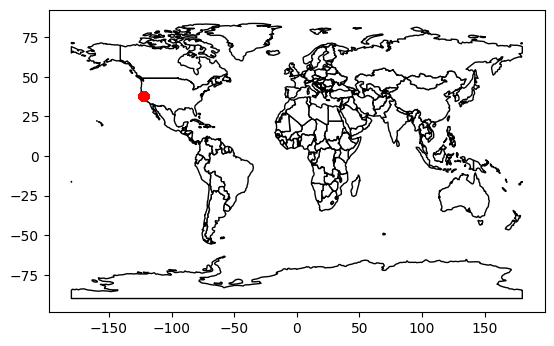

In [16]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('/content/drive/MyDrive/Capstone project/train.csv')

def create_gdf(df):
    gdf = df.copy()
    gdf['Coordinates'] = list(zip(gdf.X, gdf.Y))
    gdf.Coordinates = gdf.Coordinates.apply(Point)
    gdf = gpd.GeoDataFrame(
        gdf, geometry='Coordinates', crs={'init': 'epsg:4326'})
    return gdf

train_gdf = create_gdf(df)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
ax = world.plot(color='white', edgecolor='black')
train_gdf.plot(ax=ax, color='red')
plt.show()

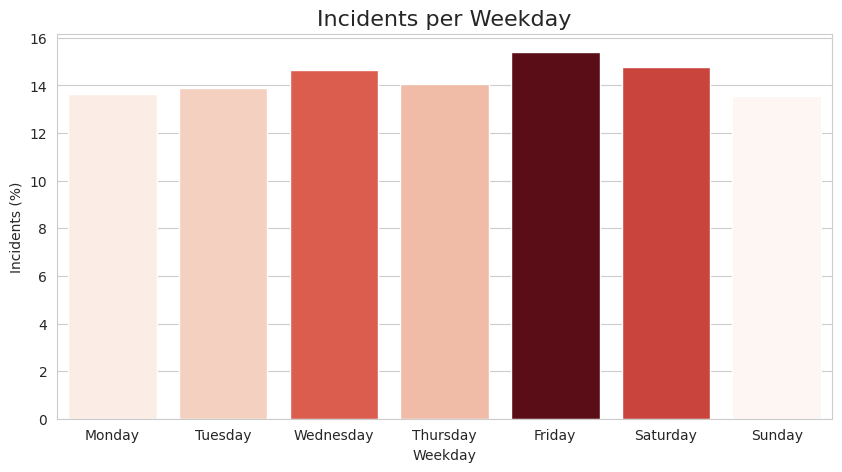

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

train = pd.read_csv('/content/drive/MyDrive/Capstone project/train.csv')

data = train.groupby('DayOfWeek').count().iloc[:, 0]
data = data.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
    'Sunday'
])

plt.figure(figsize=(10, 5))
with sns.axes_style("whitegrid"):
    ax = sns.barplot(
        x=data.index, y=(data.values / data.values.sum()) * 100,
        orient='v',
        palette=cm.ScalarMappable(cmap='Reds').to_rgba(data.values))

plt.title('Incidents per Weekday', fontdict={'fontsize': 16})
plt.xlabel('Weekday')
plt.ylabel('Incidents (%)')

plt.show()

In [18]:
!pip install contextily

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/usr/local/lib/python3.9/dist-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


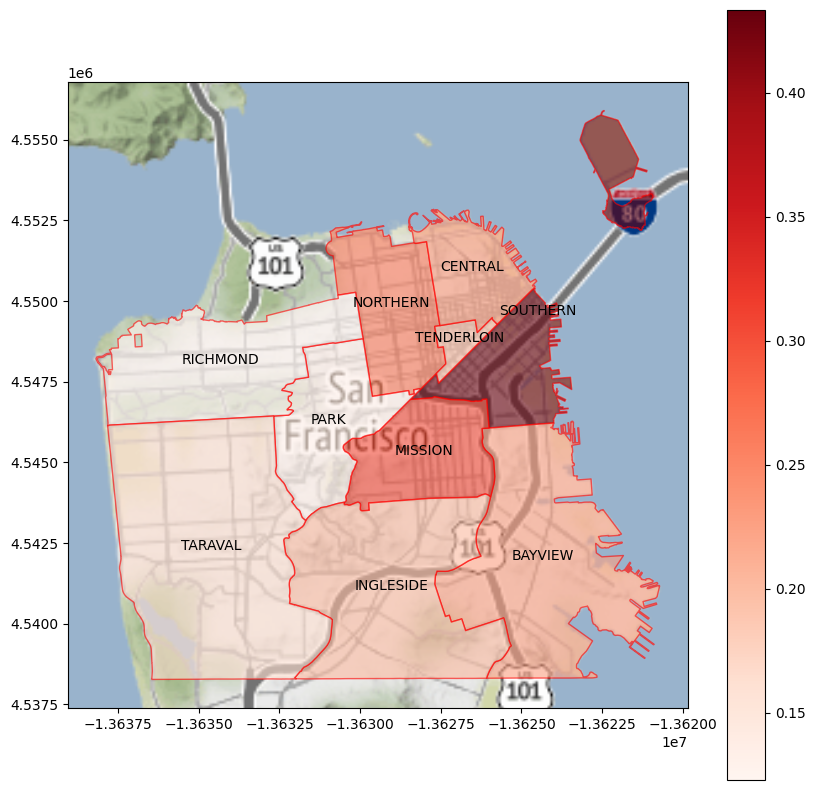

In [19]:
import urllib.request
import shutil
import zipfile
import os
import re
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import pandas as pd

# Downloading the shapefile of the area
url = 'https://data.sfgov.org/api/geospatial/wkhw-cjsf?method=export&format=Shapefile'
with urllib.request.urlopen(url) as response, open('pd_data.zip', 'wb') as out_file:
    shutil.copyfileobj(response, out_file)

# Unzipping it
with zipfile.ZipFile('pd_data.zip', 'r') as zip_ref:
    zip_ref.extractall('pd_data')

# Loading to a geopandas dataframe
for filename in os.listdir('./pd_data/'):
    if re.match(".+\.shp", filename):
        pd_districts = gpd.read_file('./pd_data/'+filename)
        break

# Defining the coordinate system to longitude/latitude
pd_districts.crs = {'init': 'epsg:4326'}

# Merging our train dataset with the geo-dataframe
pd_districts = pd_districts.merge(
    train.groupby('PdDistrict').count().iloc[:, [0]].rename(
        columns={'Dates': 'Incidents'}),
    how='inner',
    left_on='district',
    right_index=True,
    suffixes=('_x', '_y'))

# Transforming the coordinate system to Spherical Mercator for compatibility with the tiling background
pd_districts = pd_districts.to_crs({'init': 'epsg:3857'})

# Calculating the incidents per day for every district
train_days = train.groupby('Dates').count().shape[0]
pd_districts['inc_per_day'] = pd_districts.Incidents/train_days

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 10))
pd_districts.plot(
    column='inc_per_day',
    cmap='Reds',
    alpha=0.6,
    edgecolor='r',
    linestyle='-',
    linewidth=1,
    legend=True,
    ax=ax)

def add_basemap(ax, zoom, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    """Function that adds the tile background to the map"""
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom, url=url)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

# Adding the background
def add_basemap(ax, zoom=11, url='http://tile.stamen.com/terrain/tileZ/tileX/tileY.png'):
    xmin, xmax, ymin, ymax = ax.axis()
    basemap, extent = ctx.bounds2img(xmin, ymin, xmax, ymax, zoom=zoom)
    ax.imshow(basemap, extent=extent, interpolation='bilinear')
    # restore original x/y limits
    ax.axis((xmin, xmax, ymin, ymax))

# Adding the name of the districts
for index in pd_districts.index:
    plt.annotate(
        pd_districts.loc[index].district,
        (pd_districts.loc[index].geometry.centroid.x, pd_districts.loc[index].geometry.centroid.y),
        color='black',
        fontsize=10,
        ha='center')

# Adding the background
add_basemap(ax, zoom=11)

In [20]:
df.columns

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y'],
      dtype='object')

In [22]:
df['Dates'] = pd.to_datetime(df['Dates'])
df['Day'] = df['Dates'].dt.day_of_year

<Axes: title={'center': 'Most crimes on day of year'}, xlabel='Day of year', ylabel='Count of crime'>

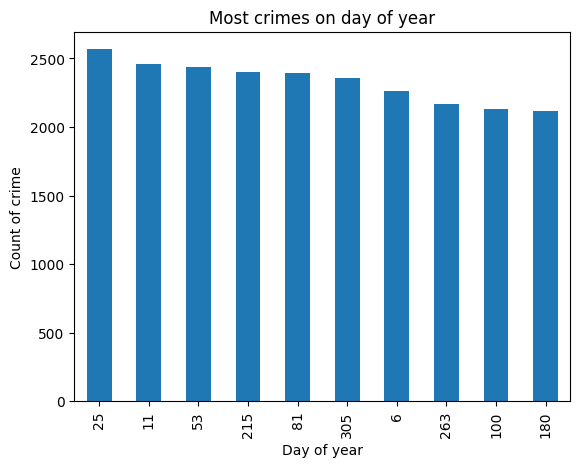

In [23]:
df['Day'].value_counts().head(10).plot(kind='bar', xlabel='Day of year', ylabel='Count of crime', title='Most crimes on day of year')

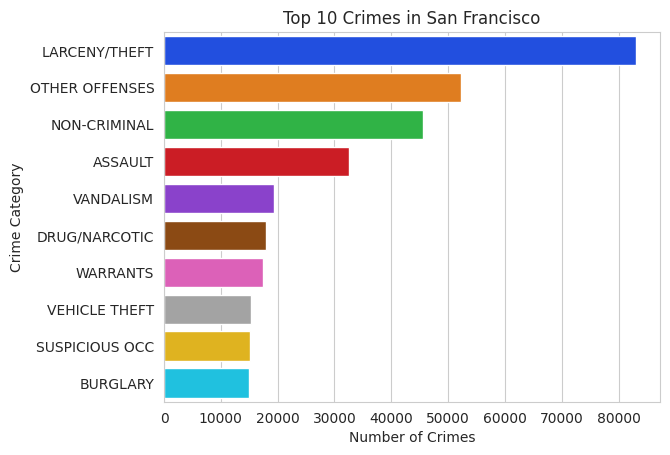

In [24]:
import seaborn as sns

sns.set_palette("bright")
sns.set_style("whitegrid")

top_crimes = df['Category'].value_counts().head(10)
sns.barplot(x=top_crimes.values, y=top_crimes.index, palette='bright')
plt.xlabel('Number of Crimes')
plt.ylabel('Crime Category')
plt.title('Top 10 Crimes in San Francisco')
plt.show()

In [25]:
df['Dates'] = pd.to_datetime(df['Dates'])
df['Month'] = df['Dates'].dt.month

<Axes: title={'center': 'Most crimes on Month of year'}, xlabel='Month of year', ylabel='Count of crime'>

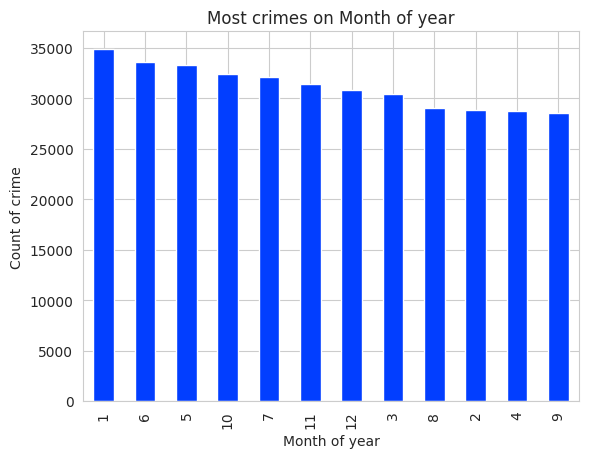

In [26]:
df['Month'].value_counts().head(12).plot(kind='bar', xlabel='Month of year', ylabel='Count of crime', title='Most crimes on Month of year')

In [27]:
df.Address.head()

0        POTRERO AV / 21ST ST
1       2600 Block of 23RD AV
2     1300 Block of HAIGHT ST
3    1500 Block of LOMBARD ST
4      1200 Block of GROVE ST
Name: Address, dtype: object

In [28]:
l = pd.Series(df.Address.head())

In [29]:
l2 = pd.Series('9th st / folsom st')

In [ ]:
l = l.append(l2)

In [31]:
l

0        POTRERO AV / 21ST ST
1       2600 Block of 23RD AV
2     1300 Block of HAIGHT ST
3    1500 Block of LOMBARD ST
4      1200 Block of GROVE ST
0          9th st / folsom st
dtype: object

In [32]:
# for i in l
# l.apply(lambda x: x[1:] if x[0].isdigit() else x)
l.str.replace('\d+ ','', regex=True)

0    POTRERO AV / 21ST ST
1        Block of 23RD AV
2      Block of HAIGHT ST
3     Block of LOMBARD ST
4       Block of GROVE ST
0      9th st / folsom st
dtype: object

In [33]:
df['Address'] = df.Address.str.replace('\d+ ','', regex=True)

<Axes: title={'center': 'Most crimes on area'}, xlabel='Most crime spot', ylabel='Count of crime'>

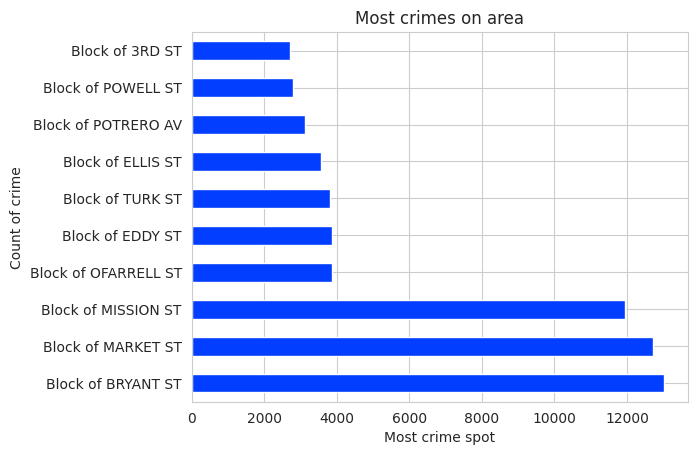

In [34]:
df.Address.value_counts().head(10).plot(kind='barh', xlabel='Most crime spot', ylabel='Count of crime', title='Most crimes on area')

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373989 entries, 0 to 373988
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   Dates       373989 non-null  datetime64[ns]
 1   Category    373989 non-null  object        
 2   Descript    373989 non-null  object        
 3   DayOfWeek   373989 non-null  object        
 4   PdDistrict  373989 non-null  object        
 5   Resolution  373989 non-null  object        
 6   Address     373989 non-null  object        
 7   X           373989 non-null  float64       
 8   Y           373989 non-null  float64       
 9   Day         373989 non-null  int64         
 10  Month       373989 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(6)
memory usage: 31.4+ MB


In [36]:
df['Day_of_week'] = df['Dates'].dt.dayofweek

<Axes: title={'center': 'Most crimes on day of week'}, xlabel='Most crime on day', ylabel='Count of crime'>

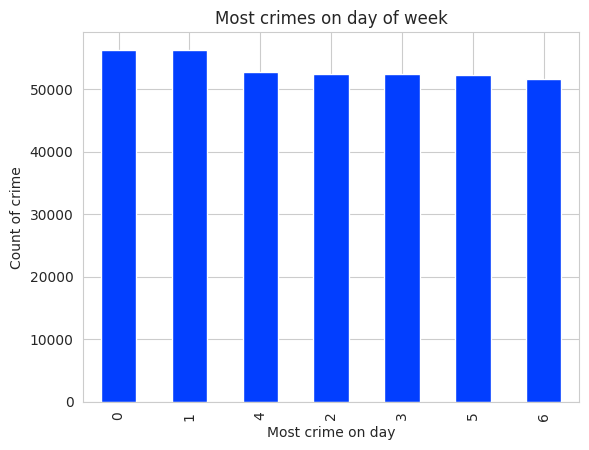

In [37]:
df.Day_of_week.value_counts().plot(kind='bar', xlabel='Most crime on day', ylabel='Count of crime', title='Most crimes on day of week')


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373989 entries, 0 to 373988
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Dates        373989 non-null  datetime64[ns]
 1   Category     373989 non-null  object        
 2   Descript     373989 non-null  object        
 3   DayOfWeek    373989 non-null  object        
 4   PdDistrict   373989 non-null  object        
 5   Resolution   373989 non-null  object        
 6   Address      373989 non-null  object        
 7   X            373989 non-null  float64       
 8   Y            373989 non-null  float64       
 9   Day          373989 non-null  int64         
 10  Month        373989 non-null  int64         
 11  Day_of_week  373989 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 34.2+ MB


In [39]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [40]:
df['Category_num'] = le.fit_transform(df.Category)

In [41]:
df.Address.nunique()

11303

In [42]:
le2 = preprocessing.LabelEncoder()

In [43]:
df['Address_num'] = le2.fit_transform(df.Address)

In [44]:
# df.info()
le3 = preprocessing.LabelEncoder()

In [45]:
df['District_num'] = le3.fit_transform(df.PdDistrict)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373989 entries, 0 to 373988
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Dates         373989 non-null  datetime64[ns]
 1   Category      373989 non-null  object        
 2   Descript      373989 non-null  object        
 3   DayOfWeek     373989 non-null  object        
 4   PdDistrict    373989 non-null  object        
 5   Resolution    373989 non-null  object        
 6   Address       373989 non-null  object        
 7   X             373989 non-null  float64       
 8   Y             373989 non-null  float64       
 9   Day           373989 non-null  int64         
 10  Month         373989 non-null  int64         
 11  Day_of_week   373989 non-null  int64         
 12  Category_num  373989 non-null  int64         
 13  Address_num   373989 non-null  int64         
 14  District_num  373989 non-null  int64         
dtypes: datetime64[ns]

In [47]:
print(df.columns)

Index(['Dates', 'Category', 'Descript', 'DayOfWeek', 'PdDistrict',
       'Resolution', 'Address', 'X', 'Y', 'Day', 'Month', 'Day_of_week',
       'Category_num', 'Address_num', 'District_num'],
      dtype='object')


In [49]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier


# Select features and target
features = ['DayOfWeek', 'PdDistrict']
target = 'Category'

# One-hot encode categorical features
ohe = OneHotEncoder()
ohe.fit(df[features])
X = ohe.transform(df[features]).toarray()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df[target], test_size=0.2, random_state=42)

# Train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Evaluate KNN classifier
score = knn.score(X_test, y_test)
print(f'KNN accuracy score: {score:.4f}')

KNN accuracy score: 0.1515


In [50]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix, hstack
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Select features and target
features = ['DayOfWeek', 'PdDistrict']
target = 'Category'

# Handle missing values
df = df.dropna()

# One-hot encode categorical features
ohe = OneHotEncoder()
ohe.fit(df[features])
X_cat = ohe.transform(df[features])

# Scale numerical features
scaler = MinMaxScaler()
X_num = scaler.fit_transform(df[['X', 'Y']])
X_num_sparse = csr_matrix(X_num)

# Combine categorical and numerical features
X = hstack([X_cat, X_num_sparse])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df[target], test_size=0.2, random_state=42)

# Train Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Evaluate Naive Bayes classifier
y_pred = nb.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'Naive Bayes accuracy score: {score:.4f}')


Naive Bayes accuracy score: 0.2322


In [51]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix, hstack
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Select features and target
features = ['DayOfWeek', 'PdDistrict', 'DistanceFromLandmark']
target = 'Category'

# Handle missing values
df = df.dropna()

# Define landmark coordinates
landmark_x = -122.4194
landmark_y = 37.7749

# Feature engineering
df['DistanceFromLandmark'] = np.sqrt((df['X'] - landmark_x)**2 + (df['Y'] - landmark_y)**2)

# One-hot encode categorical features
ohe = OneHotEncoder()
ohe.fit(df[features])
X_cat = ohe.transform(df[features])

# Scale numerical features
scaler = MinMaxScaler()
X_num = scaler.fit_transform(df[['X', 'Y', 'DistanceFromLandmark']])
X_num_sparse = csr_matrix(X_num)

# Combine categorical and numerical features
X = hstack([X_cat, X_num_sparse])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df[target], test_size=0.2, random_state=42)

# Train Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Evaluate Naive Bayes classifier
y_pred = nb.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'Naive Bayes accuracy score: {score:.4f}')



Naive Bayes accuracy score: 0.2812


In [52]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix, hstack
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Load data from CSV file
df = pd.read_csv('/content/drive/MyDrive/Capstone project/train.csv')

# Select features and target
features = ['DayOfWeek', 'PdDistrict', 'DistanceFromLandmark']
target = 'Category'

# Handle missing values
df = df.dropna()

# Define landmark coordinates
landmark_x = -122.4194
landmark_y = 37.7749

# Feature engineering
df['DistanceFromLandmark'] = np.sqrt((df['X'] - landmark_x)**2 + (df['Y'] - landmark_y)**2)

# Drop unnecessary columns
df = df.drop(['Descript', 'Resolution', 'Address', 'X', 'Y'], axis=1)

# One-hot encode categorical features
ohe = OneHotEncoder()
ohe.fit(df[features])
X_cat = ohe.transform(df[features])

# Scale numerical features
scaler = MinMaxScaler()
X_num = scaler.fit_transform(df[['DistanceFromLandmark']])
X_num_sparse = csr_matrix(X_num)

# Combine categorical and numerical features
X = hstack([X_cat, X_num_sparse])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df[target], test_size=0.2, random_state=42)

# Train Naive Bayes classifier
nb = MultinomialNB()
nb.fit(X_train, y_train)

# Evaluate Naive Bayes classifier
y_pred = nb.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f'Naive Bayes accuracy score: {score:.4f}')

Naive Bayes accuracy score: 0.2815


In [53]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix, hstack
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Capstone project/train.csv')

# Select features and target
features = ['DayOfWeek', 'PdDistrict']
target = 'Category'

# Handle missing values
df = df.dropna()

# Feature engineering
# Extract hour from the 'Dates' column and one-hot encode it
df['Dates'] = pd.to_datetime(df['Dates'])
df['Hour'] = df['Dates'].dt.hour
features.append('Hour')

# Define landmark coordinates
landmark_x = -122.4194
landmark_y = 37.7749

# Compute distance from landmark and add as a feature
df['DistanceFromLandmark'] = np.sqrt((df['X'] - landmark_x)**2 + (df['Y'] - landmark_y)**2)

# One-hot encode categorical features
ohe = OneHotEncoder()
ohe.fit(df[features])
X_cat = ohe.transform(df[features])

# Scale numerical features
scaler = MinMaxScaler()
X_num = scaler.fit_transform(df[['X', 'Y', 'DistanceFromLandmark']])
X_num_sparse = csr_matrix(X_num)

# Combine categorical and numerical features
X = hstack([X_cat, X_num_sparse])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, df[target], test_size=0.2, random_state=42)

# Train SVM classifier
svm = LinearSVC()
svm.fit(X_train, y_train)

# Evaluate SVM classifier
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.2398
Precision: 0.1313
Recall: 0.2398
F1 score: 0.1420


In [54]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load data
data = pd.read_csv('/content/drive/MyDrive/Capstone project/train.csv', parse_dates=['Dates'])

# Feature engineering
data['Year'] = data['Dates'].dt.year
data['Month'] = data['Dates'].dt.month
data['Day'] = data['Dates'].dt.day
data['Hour'] = data['Dates'].dt.hour
data['Minute'] = data['Dates'].dt.minute
data['Block'] = data['Address'].str.contains('block', case=False)
data['Block'] = data['Block'].map(lambda x: 1 if x == True else 0)
le = LabelEncoder()
data['Category'] = le.fit_transform(data['Category'])
data['PdDistrict'] = le.fit_transform(data['PdDistrict'])
data['DayOfWeek'] = le.fit_transform(data['DayOfWeek'])

# Select features and target
features = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'Block', 'PdDistrict', 'DayOfWeek', 'X', 'Y']
target = 'Category'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

# Train Random Forest classifier
rf = RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
rf.fit(X_train, y_train)

# Evaluate Random Forest classifier
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Random Forest accuracy score: {accuracy:.4f}')
print(f'Random Forest f1 score: {f1:.4f}')
print(f'Random Forest precision score: {precision:.4f}')
print(f'Random Forest recall score: {recall:.4f}')

Random Forest accuracy score: 0.3333
Random Forest f1 score: 0.2898
Random Forest precision score: 0.2856
Random Forest recall score: 0.3333


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [55]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Load data
df = pd.read_csv('/content/drive/MyDrive/Capstone project/train.csv')

# Feature engineering
df['Hour'] = pd.to_datetime(df['Dates']).dt.hour
df['Month'] = pd.to_datetime(df['Dates']).dt.month
df['Year'] = pd.to_datetime(df['Dates']).dt.year

# Encode categorical variables
le = LabelEncoder()
df['PdDistrict'] = le.fit_transform(df['PdDistrict'])
df['DayOfWeek'] = le.fit_transform(df['DayOfWeek'])
df['Category'] = le.fit_transform(df['Category'])

# Split data into features and target
X = df[['X', 'Y', 'PdDistrict', 'DayOfWeek', 'Hour', 'Month', 'Year']]
y = to_categorical(df['Category'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define neural network architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=256, validation_split=0.2, callbacks=[early_stop])

# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_test = np.argmax(y_test, axis=-1)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {acc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')


Epoch 1/10
935/935 [==============================] - 5s 5ms/step - loss: 8.7345 - accuracy: 0.2054 - val_loss: 2.9678 - val_accuracy: 0.2230
Epoch 2/10
935/935 [==============================] - 6s 6ms/step - loss: 2.8330 - accuracy: 0.2224 - val_loss: 2.7310 - val_accuracy: 0.2230
Epoch 3/10
935/935 [==============================] - 4s 5ms/step - loss: 2.6939 - accuracy: 0.2226 - val_loss: 2.6649 - val_accuracy: 0.2230
Epoch 4/10
935/935 [==============================] - 4s 5ms/step - loss: 2.6552 - accuracy: 0.2226 - val_loss: 2.6444 - val_accuracy: 0.2230
Epoch 5/10
935/935 [==============================] - 6s 6ms/step - loss: 2.6411 - accuracy: 0.2226 - val_loss: 2.6358 - val_accuracy: 0.2230
Epoch 6/10
935/935 [==============================] - 5s 5ms/step - loss: 2.6347 - accuracy: 0.2226 - val_loss: 2.6315 - val_accuracy: 0.2230
Epoch 7/10
935/935 [==============================] - 5s 5ms/step - loss: 2.6317 - accuracy: 0.2226 - val_loss: 2.6290 - val_accuracy: 0.2230
Epoch 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [56]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Load data
df = pd.read_csv('/content/drive/MyDrive/Capstone project/train.csv')

# Feature engineering
df['Hour'] = pd.to_datetime(df['Dates']).dt.hour
df['Month'] = pd.to_datetime(df['Dates']).dt.month
df['Year'] = pd.to_datetime(df['Dates']).dt.year

# Encode categorical variables
le = LabelEncoder()
df['PdDistrict'] = le.fit_transform(df['PdDistrict'])
df['DayOfWeek'] = le.fit_transform(df['DayOfWeek'])
df['Category'] = le.fit_transform(df['Category'])

# Split data into features and target
X = df[['X', 'Y', 'PdDistrict', 'DayOfWeek', 'Hour', 'Month', 'Year']]
y = to_categorical(df['Category'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define neural network architecture
model = Sequential()
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=256, validation_split=0.2, callbacks=[early_stop])

# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_test = np.argmax(y_test, axis=-1)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {acc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Epoch 1/10
935/935 [==============================] - 6s 6ms/step - loss: 12.2482 - accuracy: 0.1632 - val_loss: 2.9771 - val_accuracy: 0.2230
Epoch 2/10
935/935 [==============================] - 5s 5ms/step - loss: 2.8458 - accuracy: 0.2224 - val_loss: 2.7380 - val_accuracy: 0.2230
Epoch 3/10
935/935 [==============================] - 6s 6ms/step - loss: 2.7006 - accuracy: 0.2226 - val_loss: 2.6688 - val_accuracy: 0.2230
Epoch 4/10
935/935 [==============================] - 5s 5ms/step - loss: 2.6581 - accuracy: 0.2226 - val_loss: 2.6465 - val_accuracy: 0.2230
Epoch 5/10
935/935 [==============================] - 4s 5ms/step - loss: 2.6428 - accuracy: 0.2226 - val_loss: 2.6370 - val_accuracy: 0.2230
Epoch 6/10
935/935 [==============================] - 5s 6ms/step - loss: 2.6358 - accuracy: 0.2226 - val_loss: 2.6321 - val_accuracy: 0.2230
Epoch 7/10
935/935 [==============================] - 5s 5ms/step - loss: 2.6322 - accuracy: 0.2226 - val_loss: 2.6294 - val_accuracy: 0.2230
Epoch

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Load data
df = pd.read_csv('/content/drive/MyDrive/Capstone project/train.csv')

# Feature engineering
df['Hour'] = pd.to_datetime(df['Dates']).dt.hour
df['Month'] = pd.to_datetime(df['Dates']).dt.month
df['Year'] = pd.to_datetime(df['Dates']).dt.year

# Encode categorical variables
le = LabelEncoder()
df['PdDistrict'] = le.fit_transform(df['PdDistrict'])
df['DayOfWeek'] = le.fit_transform(df['DayOfWeek'])
df['Category'] = le.fit_transform(df['Category'])

# Split data into features and target
X = df[['X', 'Y', 'PdDistrict', 'DayOfWeek', 'Hour', 'Month', 'Year']]
y = to_categorical(df['Category'])

# Normalize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define neural network architecture
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(39, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=256, validation_split=0.2, callbacks=[early_stop])

# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_test = np.argmax(y_test, axis=-1)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {acc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Epoch 1/10
935/935 [==============================] - 9s 8ms/step - loss: 2.6342 - accuracy: 0.2302 - val_loss: 2.5489 - val_accuracy: 0.2423
Epoch 2/10
935/935 [==============================] - 8s 9ms/step - loss: 2.5600 - accuracy: 0.2406 - val_loss: 2.5313 - val_accuracy: 0.2450
Epoch 3/10
935/935 [==============================] - 8s 9ms/step - loss: 2.5413 - accuracy: 0.2432 - val_loss: 2.5188 - val_accuracy: 0.2472
Epoch 4/10
935/935 [==============================] - 8s 8ms/step - loss: 2.5299 - accuracy: 0.2460 - val_loss: 2.5073 - val_accuracy: 0.2501
Epoch 5/10
935/935 [==============================] - 8s 9ms/step - loss: 2.5210 - accuracy: 0.2483 - val_loss: 2.5003 - val_accuracy: 0.2504
Epoch 6/10
935/935 [==============================] - 7s 8ms/step - loss: 2.5137 - accuracy: 0.2495 - val_loss: 2.4930 - val_accuracy: 0.2537
Epoch 7/10
935/935 [==============================] - 8s 9ms/step - loss: 2.5082 - accuracy: 0.2511 - val_loss: 2.4882 - val_accuracy: 0.2551
Epoch 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Load data
df = pd.read_csv('/content/drive/MyDrive/Capstone project/train.csv')

# Feature engineering
df['Hour'] = pd.to_datetime(df['Dates']).dt.hour
df['Month'] = pd.to_datetime(df['Dates']).dt.month
df['Year'] = pd.to_datetime(df['Dates']).dt.year

# Encode categorical variables
le = LabelEncoder()
df['PdDistrict'] = le.fit_transform(df['PdDistrict'])
df['DayOfWeek'] = le.fit_transform(df['DayOfWeek'])
df['Category'] = le.fit_transform(df['Category'])

# Split data into features and target
X = df[['X', 'Y', 'PdDistrict', 'DayOfWeek', 'Hour', 'Month', 'Year']]
y = to_categorical(df['Category'])

# Normalize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define neural network architecture
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=512, validation_split=0.2, callbacks=[early_stop])

# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_test = np.argmax(y_test, axis=-1)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {acc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Epoch 1/50
468/468 [==============================] - 6s 12ms/step - loss: 2.6638 - accuracy: 0.2251 - val_loss: 2.5655 - val_accuracy: 0.2389
Epoch 2/50
468/468 [==============================] - 6s 13ms/step - loss: 2.5744 - accuracy: 0.2387 - val_loss: 2.5433 - val_accuracy: 0.2417
Epoch 3/50
468/468 [==============================] - 5s 11ms/step - loss: 2.5554 - accuracy: 0.2401 - val_loss: 2.5286 - val_accuracy: 0.2444
Epoch 4/50
468/468 [==============================] - 5s 12ms/step - loss: 2.5440 - accuracy: 0.2425 - val_loss: 2.5193 - val_accuracy: 0.2459
Epoch 5/50
468/468 [==============================] - 6s 13ms/step - loss: 2.5348 - accuracy: 0.2440 - val_loss: 2.5115 - val_accuracy: 0.2476
Epoch 6/50
468/468 [==============================] - 5s 11ms/step - loss: 2.5273 - accuracy: 0.2453 - val_loss: 2.5049 - val_accuracy: 0.2494
Epoch 7/50
468/468 [==============================] - 6s 14ms/step - loss: 2.5196 - accuracy: 0.2480 - val_loss: 2.4979 - val_accuracy: 0.2504

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

# Load data
df = pd.read_csv('/content/drive/MyDrive/Capstone project/train.csv')

# Feature engineering
df['Hour'] = pd.to_datetime(df['Dates']).dt.hour
df['Month'] = pd.to_datetime(df['Dates']).dt.month
df['Year'] = pd.to_datetime(df['Dates']).dt.year

# Encode categorical variables
le = LabelEncoder()
df['PdDistrict'] = le.fit_transform(df['PdDistrict'])
df['DayOfWeek'] = le.fit_transform(df['DayOfWeek'])
df['Category'] = le.fit_transform(df['Category'])

# Split data into features and target
X = df[['X', 'Y', 'PdDistrict', 'DayOfWeek', 'Hour', 'Month', 'Year']]
y = to_categorical(df['Category'])

# Normalize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define neural network architecture
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=50, batch_size=256, validation_split=0.2, callbacks=[early_stop])

# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_test = np.argmax(y_test, axis=-1)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {acc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Epoch 1/50
935/935 [==============================] - 16s 15ms/step - loss: 2.6749 - accuracy: 0.2347 - val_loss: 2.5323 - val_accuracy: 0.2445
Epoch 2/50
935/935 [==============================] - 14s 15ms/step - loss: 2.5186 - accuracy: 0.2474 - val_loss: 2.5161 - val_accuracy: 0.2488
Epoch 3/50
935/935 [==============================] - 14s 15ms/step - loss: 2.5026 - accuracy: 0.2516 - val_loss: 2.4995 - val_accuracy: 0.2517
Epoch 4/50
935/935 [==============================] - 14s 15ms/step - loss: 2.4901 - accuracy: 0.2550 - val_loss: 2.4908 - val_accuracy: 0.2554
Epoch 5/50
935/935 [==============================] - 14s 15ms/step - loss: 2.4821 - accuracy: 0.2574 - val_loss: 2.4857 - val_accuracy: 0.2554
Epoch 6/50
935/935 [==============================] - 15s 16ms/step - loss: 2.4736 - accuracy: 0.2597 - val_loss: 2.4768 - val_accuracy: 0.2584
Epoch 7/50
935/935 [==============================] - 14s 15ms/step - loss: 2.4667 - accuracy: 0.2612 - val_loss: 2.4699 - val_accuracy:

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# Load data
df = pd.read_csv('/content/drive/MyDrive/Capstone project/train.csv')

# Feature engineering
df['Hour'] = pd.to_datetime(df['Dates']).dt.hour
df['Month'] = pd.to_datetime(df['Dates']).dt.month
df['Year'] = pd.to_datetime(df['Dates']).dt.year

# Encode categorical variables
le = LabelEncoder()
df['PdDistrict'] = le.fit_transform(df['PdDistrict'])
df['DayOfWeek'] = le.fit_transform(df['DayOfWeek'])
df['Category'] = le.fit_transform(df['Category'])

# Split data into features and target
X = df[['X', 'Y', 'PdDistrict', 'DayOfWeek', 'Hour', 'Month', 'Year']]
y = to_categorical(df['Category'])

# Normalize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define neural network architecture
model = Sequential()
model.add(Dense(512, input_dim=X_train.shape[1]))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(LeakyReLU(alpha=0.2))
model.add(Dropout(0.2))
model.add(Dense(y.shape[1], activation='softmax'))

# Compile model
optimizer = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=256, validation_split=0.2, callbacks=[early_stop])

# Evaluate model
y_pred = np.argmax(model.predict(X_test), axis=-1)
y_test = np.argmax(y_test, axis=-1)


Epoch 1/10


/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


935/935 [==============================] - 15s 15ms/step - loss: 2.6016 - accuracy: 0.2334 - val_loss: 2.5478 - val_accuracy: 0.2408
Epoch 2/10
935/935 [==============================] - 14s 15ms/step - loss: 2.5511 - accuracy: 0.2408 - val_loss: 2.5309 - val_accuracy: 0.2423
Epoch 3/10
935/935 [==============================] - 14s 15ms/step - loss: 2.5379 - accuracy: 0.2434 - val_loss: 2.5200 - val_accuracy: 0.2454
Epoch 4/10
935/935 [==============================] - 14s 15ms/step - loss: 2.5280 - accuracy: 0.2451 - val_loss: 2.5132 - val_accuracy: 0.2470
Epoch 5/10
935/935 [==============================] - 14s 15ms/step - loss: 2.5199 - accuracy: 0.2467 - val_loss: 2.5045 - val_accuracy: 0.2496
Epoch 6/10
935/935 [==============================] - 14s 15ms/step - loss: 2.5152 - accuracy: 0.2481 - val_loss: 2.5002 - val_accuracy: 0.2499
Epoch 7/10
935/935 [==============================] - 14s 15ms/step - loss: 2.5112 - accuracy: 0.2498 - val_loss: 2.4949 - val_accuracy: 0.2509
Epo

In [61]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv1D, MaxPooling1D
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Load data
df = pd.read_csv('/content/drive/MyDrive/Capstone project/train.csv')

# Feature engineering
df['Hour'] = pd.to_datetime(df['Dates']).dt.hour
df['Month'] = pd.to_datetime(df['Dates']).dt.month
df['Year'] = pd.to_datetime(df['Dates']).dt.year

# Encode categorical variables
le = LabelEncoder()
df['PdDistrict'] = le.fit_transform(df['PdDistrict'])
df['DayOfWeek'] = le.fit_transform(df['DayOfWeek'])
df['Category'] = le.fit_transform(df['Category'])

# Split data into features and target
X = df[['X', 'Y', 'PdDistrict', 'DayOfWeek', 'Hour', 'Month', 'Year']]
y = to_categorical(df['Category'])

# Normalize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for CNN input
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)

# Define CNN architecture
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=5, padding='same', activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=2)

# Evaluate model
loss, acc = model.evaluate(X_test, y_test)
print(f'Accuracy: {acc:.4f}')

Epoch 1/10
4675/4675 - 20s - loss: 2.5874 - accuracy: 0.2352 - val_loss: 2.5462 - val_accuracy: 0.2419 - 20s/epoch - 4ms/step
Epoch 2/10
4675/4675 - 19s - loss: 2.5467 - accuracy: 0.2416 - val_loss: 2.5250 - val_accuracy: 0.2457 - 19s/epoch - 4ms/step
Epoch 3/10
4675/4675 - 17s - loss: 2.5336 - accuracy: 0.2448 - val_loss: 2.5168 - val_accuracy: 0.2494 - 17s/epoch - 4ms/step
Epoch 4/10
4675/4675 - 19s - loss: 2.5258 - accuracy: 0.2466 - val_loss: 2.5076 - val_accuracy: 0.2508 - 19s/epoch - 4ms/step
Epoch 5/10
4675/4675 - 17s - loss: 2.5197 - accuracy: 0.2481 - val_loss: 2.5028 - val_accuracy: 0.2489 - 17s/epoch - 4ms/step
Epoch 6/10
4675/4675 - 18s - loss: 2.5158 - accuracy: 0.2488 - val_loss: 2.4979 - val_accuracy: 0.2526 - 18s/epoch - 4ms/step
Epoch 7/10
4675/4675 - 19s - loss: 2.5129 - accuracy: 0.2488 - val_loss: 2.4941 - val_accuracy: 0.2532 - 19s/epoch - 4ms/step
Epoch 8/10
4675/4675 - 19s - loss: 2.5103 - accuracy: 0.2493 - val_loss: 2.4948 - val_accuracy: 0.2513 - 19s/epoch - 4

In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Load data
df = pd.read_csv('/content/drive/MyDrive/Capstone project/train.csv')

# Feature engineering
df['Hour'] = pd.to_datetime(df['Dates']).dt.hour
df['Month'] = pd.to_datetime(df['Dates']).dt.month
df['Year'] = pd.to_datetime(df['Dates']).dt.year

# Encode categorical variables
le = LabelEncoder()
df['PdDistrict'] = le.fit_transform(df['PdDistrict'])
df['DayOfWeek'] = le.fit_transform(df['DayOfWeek'])
df['Category'] = le.fit_transform(df['Category'])

# Split data into features and target
X = df[['X', 'Y', 'PdDistrict', 'DayOfWeek', 'Hour', 'Month', 'Year']]
y = to_categorical(df['Category'])

# Normalize the input features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Define LSTM architecture
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(16))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Define early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test), callbacks=[early_stop], verbose=2)

# Evaluate model
loss, acc = model.evaluate(X_test, y_test)
print(f'Accuracy: {acc:.4f}')

Epoch 1/10
4675/4675 - 38s - loss: 2.6204 - accuracy: 0.2327 - val_loss: 2.5762 - val_accuracy: 0.2377 - 38s/epoch - 8ms/step
Epoch 2/10
4675/4675 - 29s - loss: 2.5660 - accuracy: 0.2408 - val_loss: 2.5492 - val_accuracy: 0.2436 - 29s/epoch - 6ms/step
Epoch 3/10
4675/4675 - 38s - loss: 2.5456 - accuracy: 0.2441 - val_loss: 2.5297 - val_accuracy: 0.2461 - 38s/epoch - 8ms/step
Epoch 4/10
4675/4675 - 39s - loss: 2.5310 - accuracy: 0.2465 - val_loss: 2.5165 - val_accuracy: 0.2484 - 39s/epoch - 8ms/step
Epoch 5/10
4675/4675 - 29s - loss: 2.5222 - accuracy: 0.2473 - val_loss: 2.5101 - val_accuracy: 0.2501 - 29s/epoch - 6ms/step
Epoch 6/10
4675/4675 - 29s - loss: 2.5162 - accuracy: 0.2483 - val_loss: 2.5050 - val_accuracy: 0.2502 - 29s/epoch - 6ms/step
Epoch 7/10
4675/4675 - 30s - loss: 2.5121 - accuracy: 0.2497 - val_loss: 2.5008 - val_accuracy: 0.2527 - 30s/epoch - 7ms/step
Epoch 8/10
4675/4675 - 29s - loss: 2.5087 - accuracy: 0.2508 - val_loss: 2.4983 - val_accuracy: 0.2540 - 29s/epoch - 6

In [63]:
df.shape

(373989, 12)


 Correlation Matrix*


<ipython-input-64-0fb0fbeef1f1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


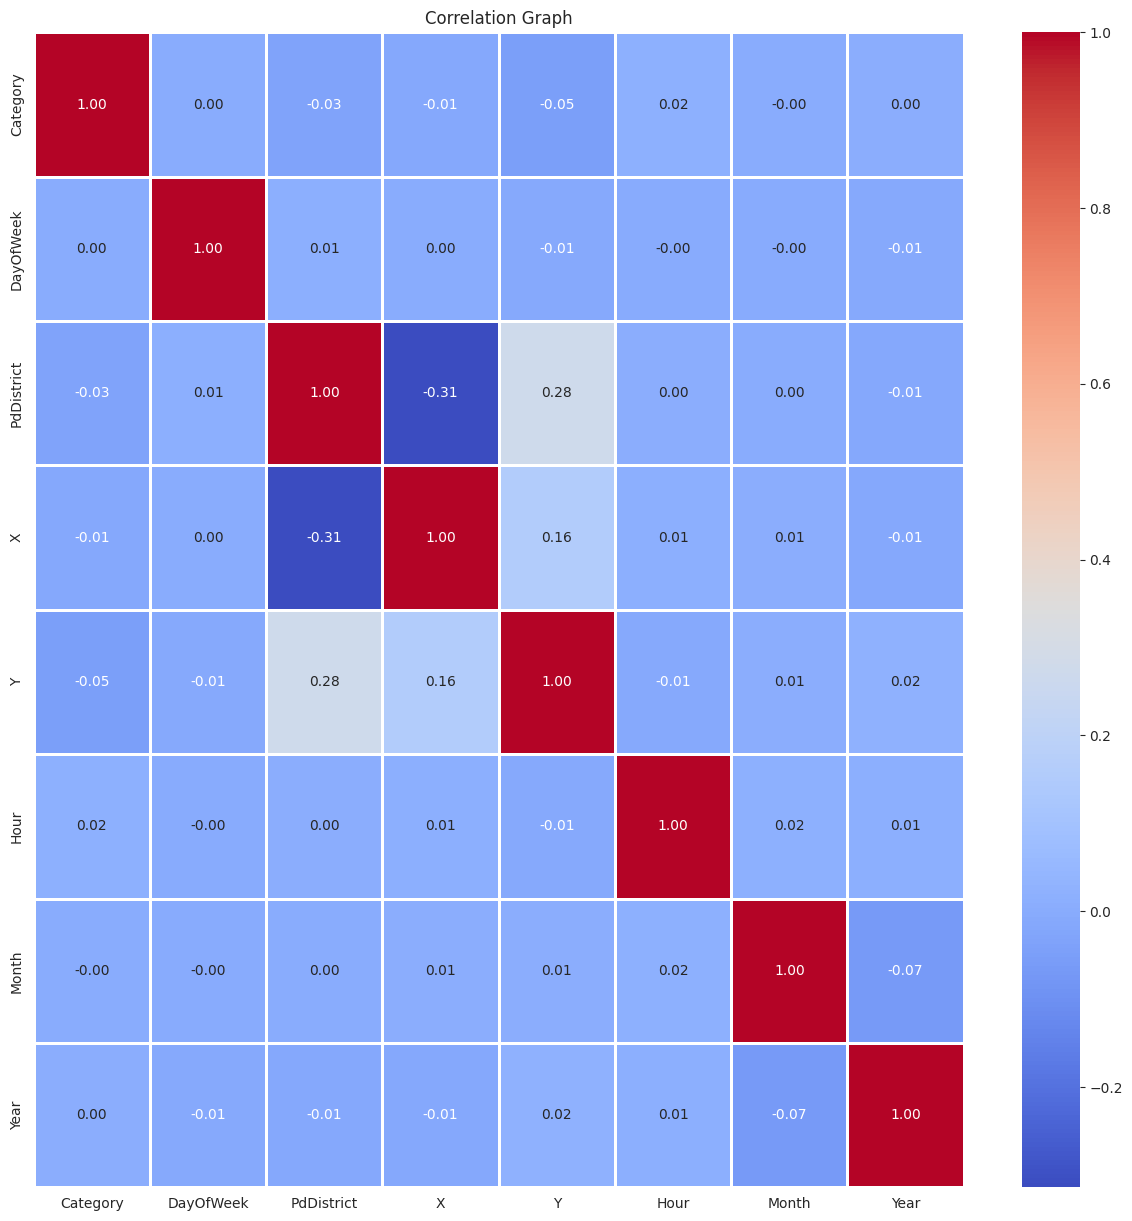

In [64]:
corr_matrix = df.corr()
plt.figure(figsize=(15, 15))

plt.title("Correlation Graph")

cmap = sns.diverging_palette( 1000, 120, as_cmap=True)
sns.heatmap(corr_matrix, annot=True, fmt='.2f',  linewidths=.8, cmap='coolwarm');

In [79]:
from tabulate import tabulate

Using_CounterVector = [["Random Forest Model", 0.33], 
        ["Support machine vector SVM", 0.26], 
        ["KNN", 0.15],
        ["Neural Network", 0.27],
        ["Naive Bayes", 0.28]]

col_names = ["Model_Name using Counter_vector Method", "Accuracy Score"]

print(tabulate(Using_CounterVector, headers=col_names, tablefmt="grid", showindex="always"))

+----+------------------------------------------+------------------+
|    | Model_Name using Counter_vector Method   |   Accuracy Score |
+====+==========================================+==================+
|  0 | Random Forest Model                      |             0.33 |
+----+------------------------------------------+------------------+
|  1 | Support machine vector SVM               |             0.26 |
+----+------------------------------------------+------------------+
|  2 | KNN                                      |             0.15 |
+----+------------------------------------------+------------------+
|  3 | Neural Network                           |             0.27 |
+----+------------------------------------------+------------------+
|  4 | Naive Bayes                              |             0.28 |
+----+------------------------------------------+------------------+
